In [1]:
!pip install diffusers 


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 22.6 MB/s eta 0:00:00


In [2]:
from diffusers import DiffusionPipeline
import torch
from PIL import Image


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [4]:

base = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, variant="fp16", use_safetensors=True
)
base.to("cuda")

refiner = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-refiner-1.0",
    
    text_encoder_2=base.text_encoder_2,
    vae=base.vae,
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16",
)
refiner.to("cuda")

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Fetching 9 files:   0%|          | 0/9 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

StableDiffusionXLImg2ImgPipeline {
  "_class_name": "StableDiffusionXLImg2ImgPipeline",
  "_diffusers_version": "0.21.4",
  "_name_or_path": "stabilityai/stable-diffusion-xl-refiner-1.0",
  "force_zeros_for_empty_prompt": false,
  "requires_aesthetics_score": true,
  "scheduler": [
    "diffusers",
    "EulerDiscreteScheduler"
  ],
  "text_encoder": [
    null,
    null
  ],
  "text_encoder_2": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "tokenizer": [
    null,
    null
  ],
  "tokenizer_2": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [5]:
weather = input("Enter the weather condition: example rainy, sunny etc.")
time_of_day = input("Enter the time of the day: example morning, evening etc.")
vehicles = input("Enter the types of vehicles: example car, bus etc.")
creativity = float(input("Enter the creativity level: example 0.5, 0.7 etc. Higher = less creative"))
depth = int(input("Enter the depth level: example 1, 2 etc. Default 75."))


prompt2 ="Improve the sharpness of the image. Along with this, depict the scenario at ", time_of_day, "time of the day. The weather is ", weather, ". There are ", vehicles, "on the road."


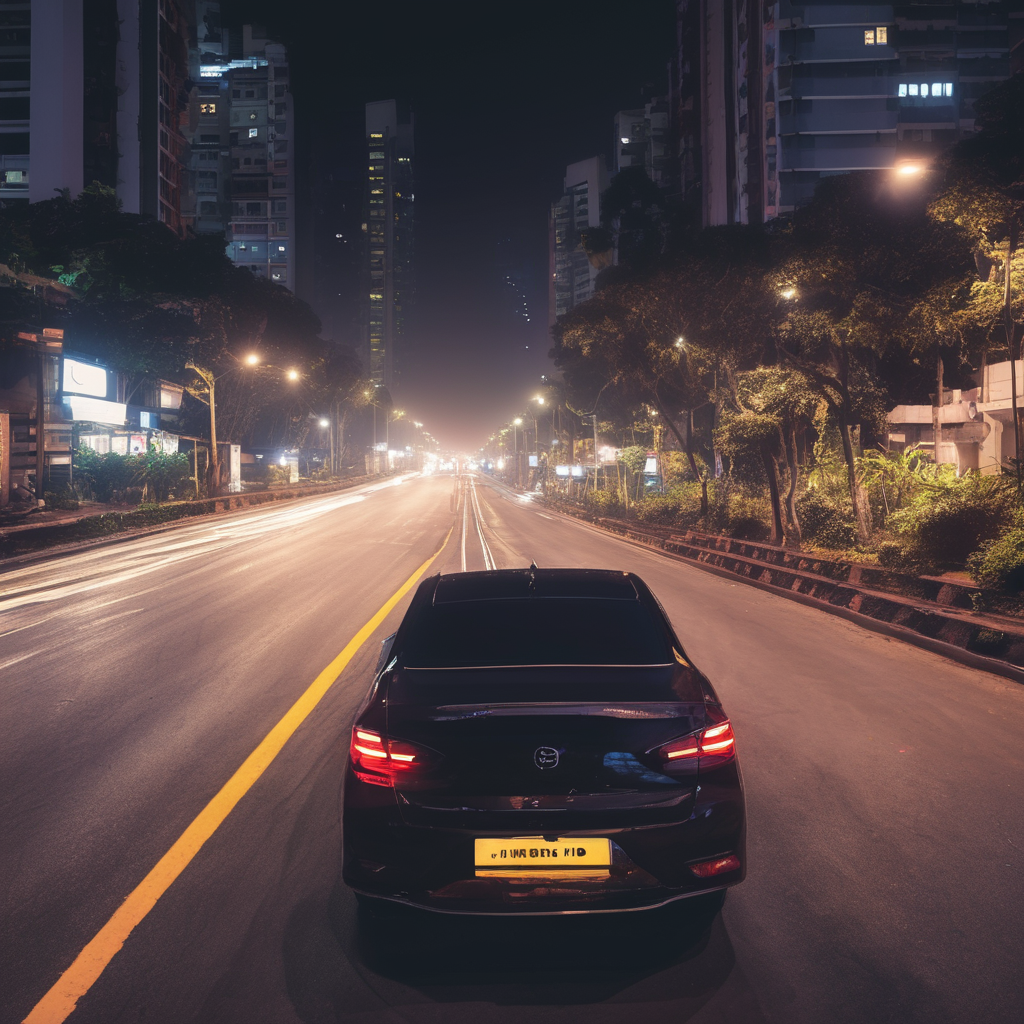

In [6]:
img = Image.open("/kaggle/input/night-ligt-car/generate a car pov shot of a modern bangalore road at night.png")
#image from model
img

In [7]:

image1 = refiner(
    prompt= prompt2,
    num_inference_steps=depth,
    image=img,
    guidance_scale=creativity,
).images[0]

  0%|          | 0/30 [00:00<?, ?it/s]

In [9]:
image1.save("generate a car pov shot of a modern bangalore road at night.png")